# 4

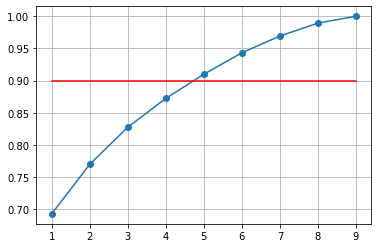

In [477]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
'''
參考  http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf
page.13 - CH3 
'''

'''
step 1 Get some data
'''
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
                   , header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)
dataClass = data['Class'].to_numpy(dtype='float')
data = data.drop(['Class'],axis=1)
data = data.replace('?',np.NaN)
data = data.to_numpy(dtype='float')
for i in range(data.shape[1]):
    data[np.isnan(data[:,i])] = np.nanmean(data[:,i]) #把NaN用mean取代
dataTrain,dataTest,classTrain,classTest = train_test_split(data,dataClass,test_size = 0.3)
'''
step 2 Subtract the mean
'''
dataMean = np.mean(dataTrain,axis = 0)
subMeanData = np.subtract(dataTrain,dataMean)
'''
step 3 Calculate the covariance matrix
'''
cov = np.mat(np.cov(subMeanData,rowvar=0)) #算完cov 再從ndarray 轉成 matrix
'''
step 4 Calculate the eigenvectors and eigenvalues of the covariance matrix
'''
e_value,e_vector = LA.eig(cov)
e_valueSortedIndex = np.argsort(e_value)[::-1] #用value排序 value在原array的index 再從大排到小 #0 1 2 4 5 6 8 7 3
#===================================================#
'''
Plot PoV(k) for k from 1 to 9 for the training set
'''
sortE_value = np.sort(e_value)[::-1] #從大排到小
total = np.sum(sortE_value) #加總
PoV = [ 0 for i in range(dataTrain.shape[1])]
for i in range(dataTrain.shape[1]):
    PoV[i] = np.sum(sortE_value[:i+1]) / total
plt.grid()
plt.plot([ i for i in range(1,data.shape[1]+1)] , PoV,'-o')
plt.plot( [ i for i in range(1,data.shape[1]+1)],[0.9 for i in range(9)],'r-')
plt.show()
#===================================================#
'''
step 5 Choosing components and forming a feature vector
'''
N = 4
pickedE_valueIndex = e_valueSortedIndex[:N]
pickedE_vector = e_vector[:,pickedE_valueIndex]
'''
stop 5 Deriving the new data set 
pdf的step標錯 
'''
lowDimData =  subMeanData * pickedE_vector 

# 5

In [455]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
def PCA(dataTrain):
    N = -1
    dataMean = np.mean(dataTrain,axis = 0)
    subMeanData = np.subtract(dataTrain,dataMean)
    cov = np.mat(np.cov(subMeanData,rowvar=0)) #算完cov 再從ndarray 轉成 matrix
    e_value,e_vector = LA.eig(cov)
    sortE_value = np.sort(e_value)[::-1] #從大排到小
    total = np.sum(sortE_value) #加總
    PoV = [ 0 for i in range(dataTrain.shape[1])]
    for i in range(dataTrain.shape[1]):
        PoV[i] = np.sum(sortE_value[:i+1]) / total
        if PoV[i] >= 0.9 and N== -1:
            N = i+1
    e_valueSortedIndex = np.argsort(e_value)[::-1] #用value排序 value在原array的index 再從大排到小 
    pickedE_valueIndex = e_valueSortedIndex[:N]
    pickedE_vector = e_vector[:,pickedE_valueIndex]
    lowDimData =  subMeanData * pickedE_vector  # 降維之後的data
    return lowDimData

In [476]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
                   , header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)
dataClass = data['Class'].to_numpy(dtype='float')
data = data.drop(['Class'],axis=1)
data = data.replace('?',np.NaN)
data = data.to_numpy(dtype='float')
for i in range(data.shape[1]):
    data[np.isnan(data[:,i])] = np.nanmean(data[:,i]) #把NaN用mean取代
accKnnTotal = []
accknnPCA = []
'''
把所有資料放進去 knn 
'''
for i in range(10):
    dataTrain,dataTest,classTrain,classTest = train_test_split(data,dataClass,test_size = 0.3)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(dataTrain,classTrain)
    accKnnTotal.append(knn.score(dataTest,classTest))
print('沒有經過PCA:\n',np.mean(accKnnTotal))
'''
把經過PCA的資料放進去knn
'''
for i in range(10):
    pcaData = PCA(data) 
    dataTrain,dataTest,classTrain,classTest = train_test_split(pcaData,dataClass,test_size = 0.3)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(dataTrain,classTrain)
    accknnPCA.append(knn.score(dataTest,classTest))
print('PCA:\n',np.mean(accknnPCA))

沒有經過PCA:
 0.9661904761904762
PCA:
 0.9685714285714286
